Feature Engineering on the Titanic Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler, KBinsDiscretizer

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

In [2]:
results={'Models':[],
         'precision':[],
         'recall':[],
         'f1':[],
         'accuracy score':[]
}

In [3]:
df = pd.read_csv('train.csv')

In [4]:
#check wether the column is binary, categorical or metric.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Before applying feature engineering , we should split the data
X = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [7]:
X.shape,y.shape

((891, 11), (891,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=100)

In [9]:
#check wether the column contains any missing values.
X_train.isna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
225,False,False,False,False,False,False,False,False,False,True,False
856,False,False,False,False,False,False,False,False,False,True,False
620,False,False,False,False,False,False,False,False,False,True,False
450,False,False,False,False,False,False,False,False,False,True,False
423,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
855,False,False,False,False,False,False,False,False,False,True,False
871,False,False,False,False,False,False,False,False,False,False,False
835,False,False,False,False,False,False,False,False,False,False,False
792,False,False,False,False,True,False,False,False,False,True,False


In [10]:
X_test.isna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
205,False,False,False,False,False,False,False,False,False,False,False
44,False,False,False,False,False,False,False,False,False,True,False
821,False,False,False,False,False,False,False,False,False,True,False
458,False,False,False,False,False,False,False,False,False,True,False
795,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,True,False
288,False,False,False,False,False,False,False,False,False,True,False
244,False,False,False,False,False,False,False,False,False,True,False
680,False,False,False,False,True,False,False,False,False,True,False


In [11]:
#to find the rows with NaN or None in all columns
X_train[X_train.isna().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
225,226,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
866,867,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
350,351,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
79,80,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S


<AxesSubplot:>

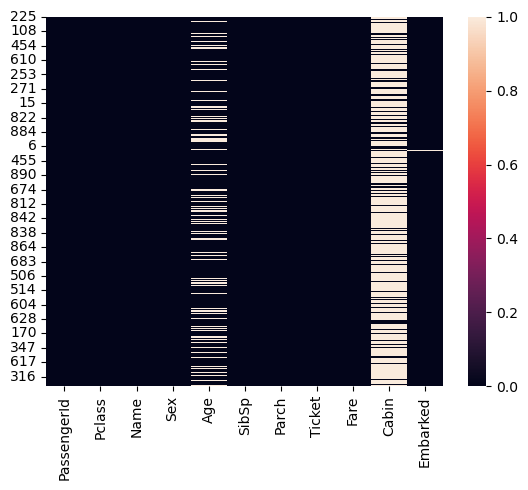

In [12]:
sns.heatmap(X_train.isna())

In [13]:
X_test[X_test.isna().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
44,45,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
821,822,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S
458,459,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
795,796,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
424,425,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
153,154,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
288,289,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S
244,245,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C


<AxesSubplot:>

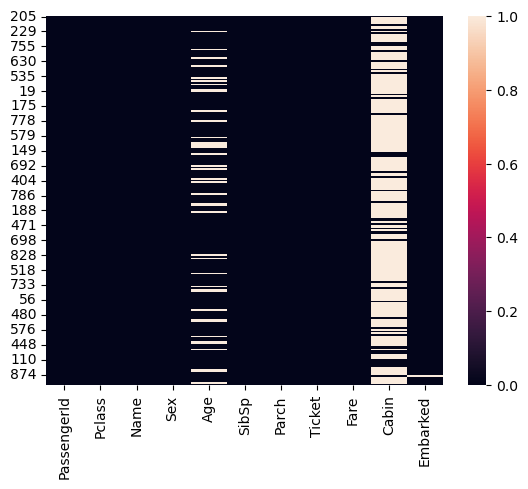

In [14]:
sns.heatmap(X_test.isna())

In [15]:
X_train.shape,X_train['Cabin'].isna().sum()

((668, 11), 509)

In [16]:
X_test.shape,X_test['Cabin'].isna().sum()

((223, 11), 178)

In [17]:
#509 rows with NaN out of 668 in Cabin column
X_train=X_train.drop('Cabin',axis=1)

<AxesSubplot:>

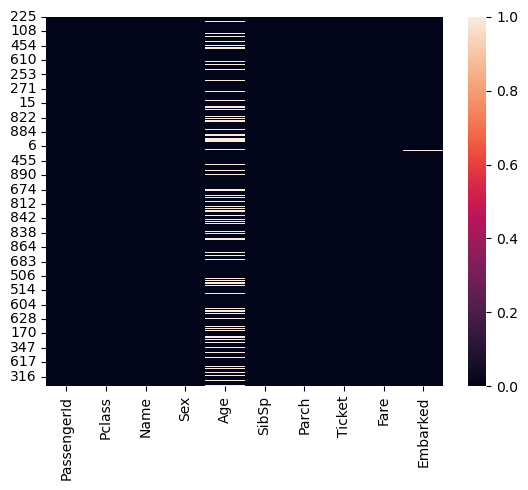

In [18]:
sns.heatmap(X_train.isna())

In [19]:
#178 rows with NaN out of 223 in Cabin column
X_test=X_test.drop('Cabin',axis=1)

<AxesSubplot:>

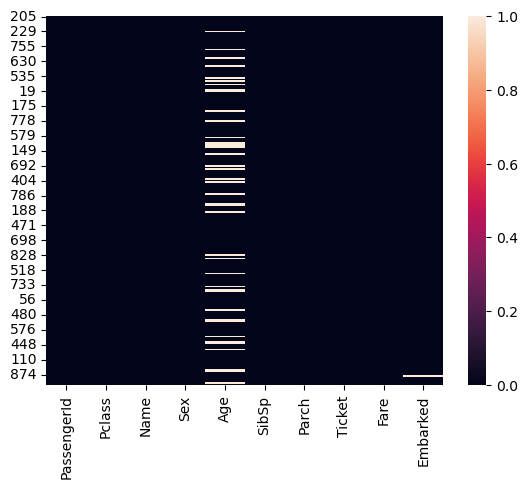

In [20]:
sns.heatmap(X_test.isna())

In [21]:
#Age column: Replace NaN with mean of Age Column

In [22]:
def imputerFunc(column):
    imputer=SimpleImputer(strategy='mean')
    imputer.fit(column)
    t=imputer.transform(column)
    return t

In [23]:
#For train data
X_train['Age']=imputerFunc(X_train[['Age']])
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
225,226,3,"Berglund, Mr. Karl Ivar Sven",male,22.000000,0,0,PP 4348,9.3500,S
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
620,621,3,"Yasbeck, Mr. Antoni",male,27.000000,1,0,2659,14.4542,C
450,451,2,"West, Mr. Edwy Arthur",male,36.000000,1,2,C.A. 34651,27.7500,S
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.000000,1,1,347080,14.4000,S
...,...,...,...,...,...,...,...,...,...,...
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.000000,0,1,392091,9.3500,S
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,1,1,11751,52.5542,S
835,836,1,"Compton, Miss. Sara Rebecca",female,39.000000,1,1,PC 17756,83.1583,C
792,793,3,"Sage, Miss. Stella Anna",female,29.893327,8,2,CA. 2343,69.5500,S


In [24]:
#For test data

X_test['Age']=imputerFunc(X_test[['Age']])
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
205,206,3,"Strom, Miss. Telma Matilda",female,2.000000,0,1,347054,10.4625,S
44,45,3,"Devaney, Miss. Margaret Delia",female,19.000000,0,0,330958,7.8792,Q
821,822,3,"Lulic, Mr. Nikola",male,27.000000,0,0,315098,8.6625,S
458,459,2,"Toomey, Miss. Ellen",female,50.000000,0,0,F.C.C. 13531,10.5000,S
795,796,2,"Otter, Mr. Richard",male,39.000000,0,0,28213,13.0000,S
...,...,...,...,...,...,...,...,...,...,...
153,154,3,"van Billiard, Mr. Austin Blyler",male,40.500000,0,2,A/5. 851,14.5000,S
288,289,2,"Hosono, Mr. Masabumi",male,42.000000,0,0,237798,13.0000,S
244,245,3,"Attalah, Mr. Sleiman",male,30.000000,0,0,2694,7.2250,C
680,681,3,"Peters, Miss. Katie",female,29.131429,0,0,330935,8.1375,Q


<AxesSubplot:>

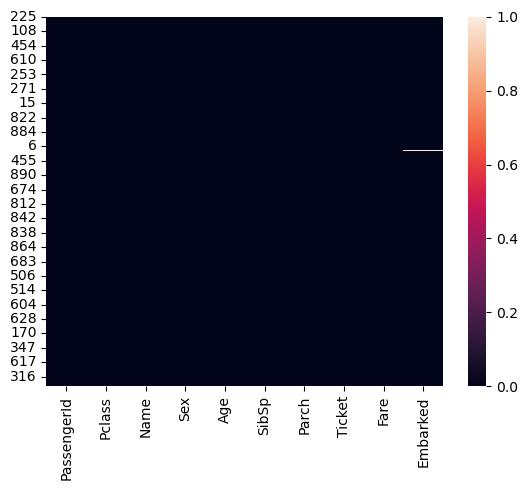

In [25]:
sns.heatmap(X_train.isna())

<AxesSubplot:>

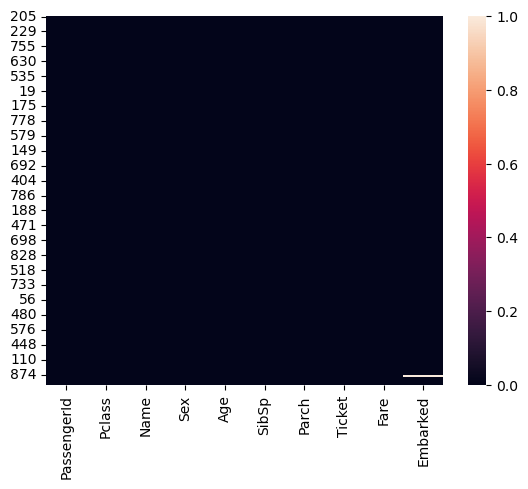

In [26]:
sns.heatmap(X_test.isna())

# Method - 1 Baseline Model

In [27]:
m = DummyClassifier(strategy='most_frequent')
m.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [28]:
mpred_y=m.predict(X_train)
mpred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
mpred_y_test=m.predict(X_test)
mpred_y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [30]:
m.score(X_train, y_train)

0.6317365269461078

In [31]:
m.score(X_test, y_test)

0.5695067264573991

# Confusion Matrix

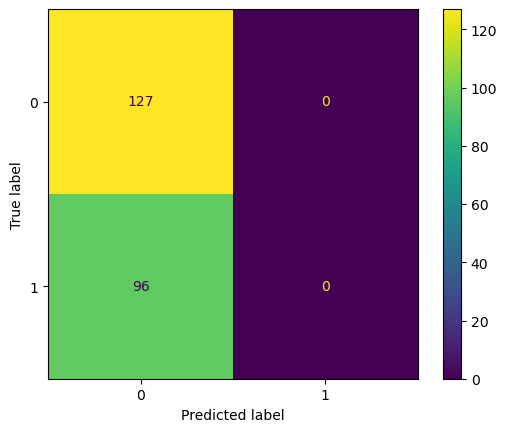

In [32]:
def confusionMatrix(ytest,ypred):
    ConfusionMatrixDisplay.from_predictions(ytest,ypred, normalize=None)
    
confusionMatrix(y_test,mpred_y_test)

In [33]:
print(f"""precision = {round(precision_score(y_test,mpred_y_test),2)} \n 
recall = {round(recall_score(y_test,mpred_y_test),2)}\n
f1 = {round(f1_score(y_test,mpred_y_test),2)}""")

precision = 0.0 
 
recall = 0.0

f1 = 0.0


/Users/niyantmehta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
results['Models'].append('Dummy Classifier')
results['precision'].append(0.0),
results['recall'].append(0.0),
results['f1'].append(0.0),
results['accuracy score'].append(accuracy_score(y_test,mpred_y_test))

# Feature Engineering

In [35]:
#ValueError: could not convert string to float: 'WE/P 5735' in LogisticRegression()

#Delete object type columns from training data
X_train=X_train.drop('Name',axis=1)
X_train=X_train.drop('Embarked',axis=1)
X_train=X_train.drop('Ticket',axis=1)
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
225,226,3,male,22.000000,0,0,9.3500
856,857,1,female,45.000000,1,1,164.8667
620,621,3,male,27.000000,1,0,14.4542
450,451,2,male,36.000000,1,2,27.7500
423,424,3,female,28.000000,1,1,14.4000
...,...,...,...,...,...,...,...
855,856,3,female,18.000000,0,1,9.3500
871,872,1,female,47.000000,1,1,52.5542
835,836,1,female,39.000000,1,1,83.1583
792,793,3,female,29.893327,8,2,69.5500


In [36]:
#Delete object type columns from training data
X_test=X_test.drop('Name',axis=1)
X_test=X_test.drop('Embarked',axis=1)
X_test=X_test.drop('Ticket',axis=1)
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
205,206,3,female,2.000000,0,1,10.4625
44,45,3,female,19.000000,0,0,7.8792
821,822,3,male,27.000000,0,0,8.6625
458,459,2,female,50.000000,0,0,10.5000
795,796,2,male,39.000000,0,0,13.0000
...,...,...,...,...,...,...,...
153,154,3,male,40.500000,0,2,14.5000
288,289,2,male,42.000000,0,0,13.0000
244,245,3,male,30.000000,0,0,7.2250
680,681,3,female,29.131429,0,0,8.1375


In [37]:
#changing Sex column: male & female with 0 & 1 for training data
le = LabelEncoder()
X_train['Sex'] = le.fit_transform(X_train['Sex'])
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
225,226,3,1,22.000000,0,0,9.3500
856,857,1,0,45.000000,1,1,164.8667
620,621,3,1,27.000000,1,0,14.4542
450,451,2,1,36.000000,1,2,27.7500
423,424,3,0,28.000000,1,1,14.4000
...,...,...,...,...,...,...,...
855,856,3,0,18.000000,0,1,9.3500
871,872,1,0,47.000000,1,1,52.5542
835,836,1,0,39.000000,1,1,83.1583
792,793,3,0,29.893327,8,2,69.5500


In [38]:
#changing Sex column: male & female with 0 & 1 for test data
le = LabelEncoder()
X_test['Sex'] = le.fit_transform(X_test['Sex'])
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
205,206,3,0,2.000000,0,1,10.4625
44,45,3,0,19.000000,0,0,7.8792
821,822,3,1,27.000000,0,0,8.6625
458,459,2,0,50.000000,0,0,10.5000
795,796,2,1,39.000000,0,0,13.0000
...,...,...,...,...,...,...,...
153,154,3,1,40.500000,0,2,14.5000
288,289,2,1,42.000000,0,0,13.0000
244,245,3,1,30.000000,0,0,7.2250
680,681,3,0,29.131429,0,0,8.1375


In [39]:
#Scale
# StandardScaler will subtract the mean from each value then scale to the unit variance
scaler = StandardScaler()
trainScale = scaler.fit_transform(X_train)
testScale = scaler.transform(X_test)

X_train = pd.DataFrame(trainScale, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(testScale, index=X_test.index, columns=X_test.columns)

In [40]:
# binning
#uniform - All bins in each feature have identical widths.
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train['Fare'] = kbins.fit_transform(X_train[['Fare']])
X_test['Fare'] = kbins.fit_transform(X_test[['Fare']])

# Method - 2 Logistic Regression

In [41]:
# instantiate the model
lr = LogisticRegression(max_iter=10000)

# fit model
lr.fit(X_train, y_train)

# look at the model parameters
w_0 = lr.intercept_[0]
w_1 = lr.coef_[0][0]
w_2 = lr.coef_[0][1]

lpred_y=lr.predict(X_test)

print(f'LogReg model coefficients :{w_1, w_2}\nLogReg model intercept: {w_0}',)

#Accuracy Score
print(f'train: {lr.score(X_train, y_train)}, test: {round(lr.score(X_test, y_test), 2)}')

#If the training score >> test score then the model is **overfitting**

LogReg model coefficients :(-0.0012338224767830424, -0.9898832614961278)
LogReg model intercept: -0.7724314093372414
train: 0.8083832335329342, test: 0.79


# Method - 3 Logistic Regression with Cross Validation

In [42]:
cross_validation_lr = cross_val_score(estimator=lr, # the model to evaluate
                                     X=X_train,
                                     y=y_train,
                                     scoring='accuracy', # evaluation metrics
                                     cv=3, # cross validation splitting
                                     verbose=5) 

[CV] END ................................ score: (test=0.789) total time=   0.0s
[CV] END ................................ score: (test=0.807) total time=   0.0s
[CV] END ................................ score: (test=0.797) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [43]:
print(f'Validation accuracy scores: {np.round(cross_validation_lr,2)}')
print(f'\nmean: {cross_validation_lr.mean():.2}')
print(f'std: {cross_validation_lr.std():.2}')
print(f'\nAccuracy score for the test set is: {round(lr.score(X_test,y_test),3)}')

Validation accuracy scores: [0.79 0.81 0.8 ]

mean: 0.8
std: 0.0073

Accuracy score for the test set is: 0.789


# Confusion Matrix

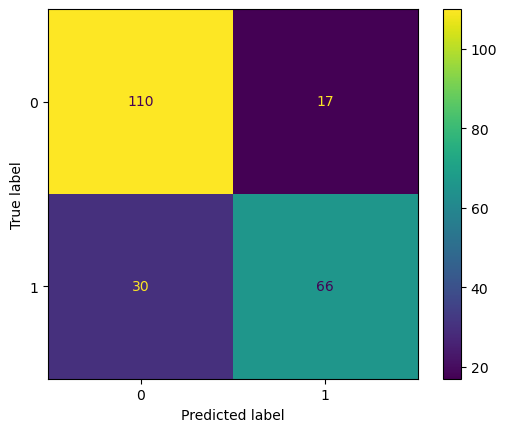

In [44]:

confusionMatrix(y_test,lpred_y)

In [45]:
print(f"""precision = {round(precision_score(y_test,lpred_y),2)} \n 
recall = {round(recall_score(y_test,lpred_y),2)}\n
f1 = {round(f1_score(y_test,lpred_y),2)}""")

precision = 0.8 
 
recall = 0.69

f1 = 0.74


In [46]:
results['Models'].append('Logistic Regression')
results['precision'].append(0.8),
results['recall'].append(0.69),
results['f1'].append(0.74),
results['accuracy score'].append(accuracy_score(y_test,lpred_y))

# Method - 4 Decision Tree

In [47]:
# 3. Instatiate the model
dt = DecisionTreeClassifier(max_depth=2) #max depth, how deep a tree can go prevent overfitting

In [48]:
# 4. Fit the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [49]:
# 5. Make prediction
dpred_y = dt.predict(X_test)
dpred_y

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1])

In [50]:
# 6. Get the accuracy score for the training set
dt.score(X_train,y_train)

0.812874251497006

In [51]:
# 7. Get and compare accuracy score for your test set
dt.score(X_test, y_test)

0.7443946188340808

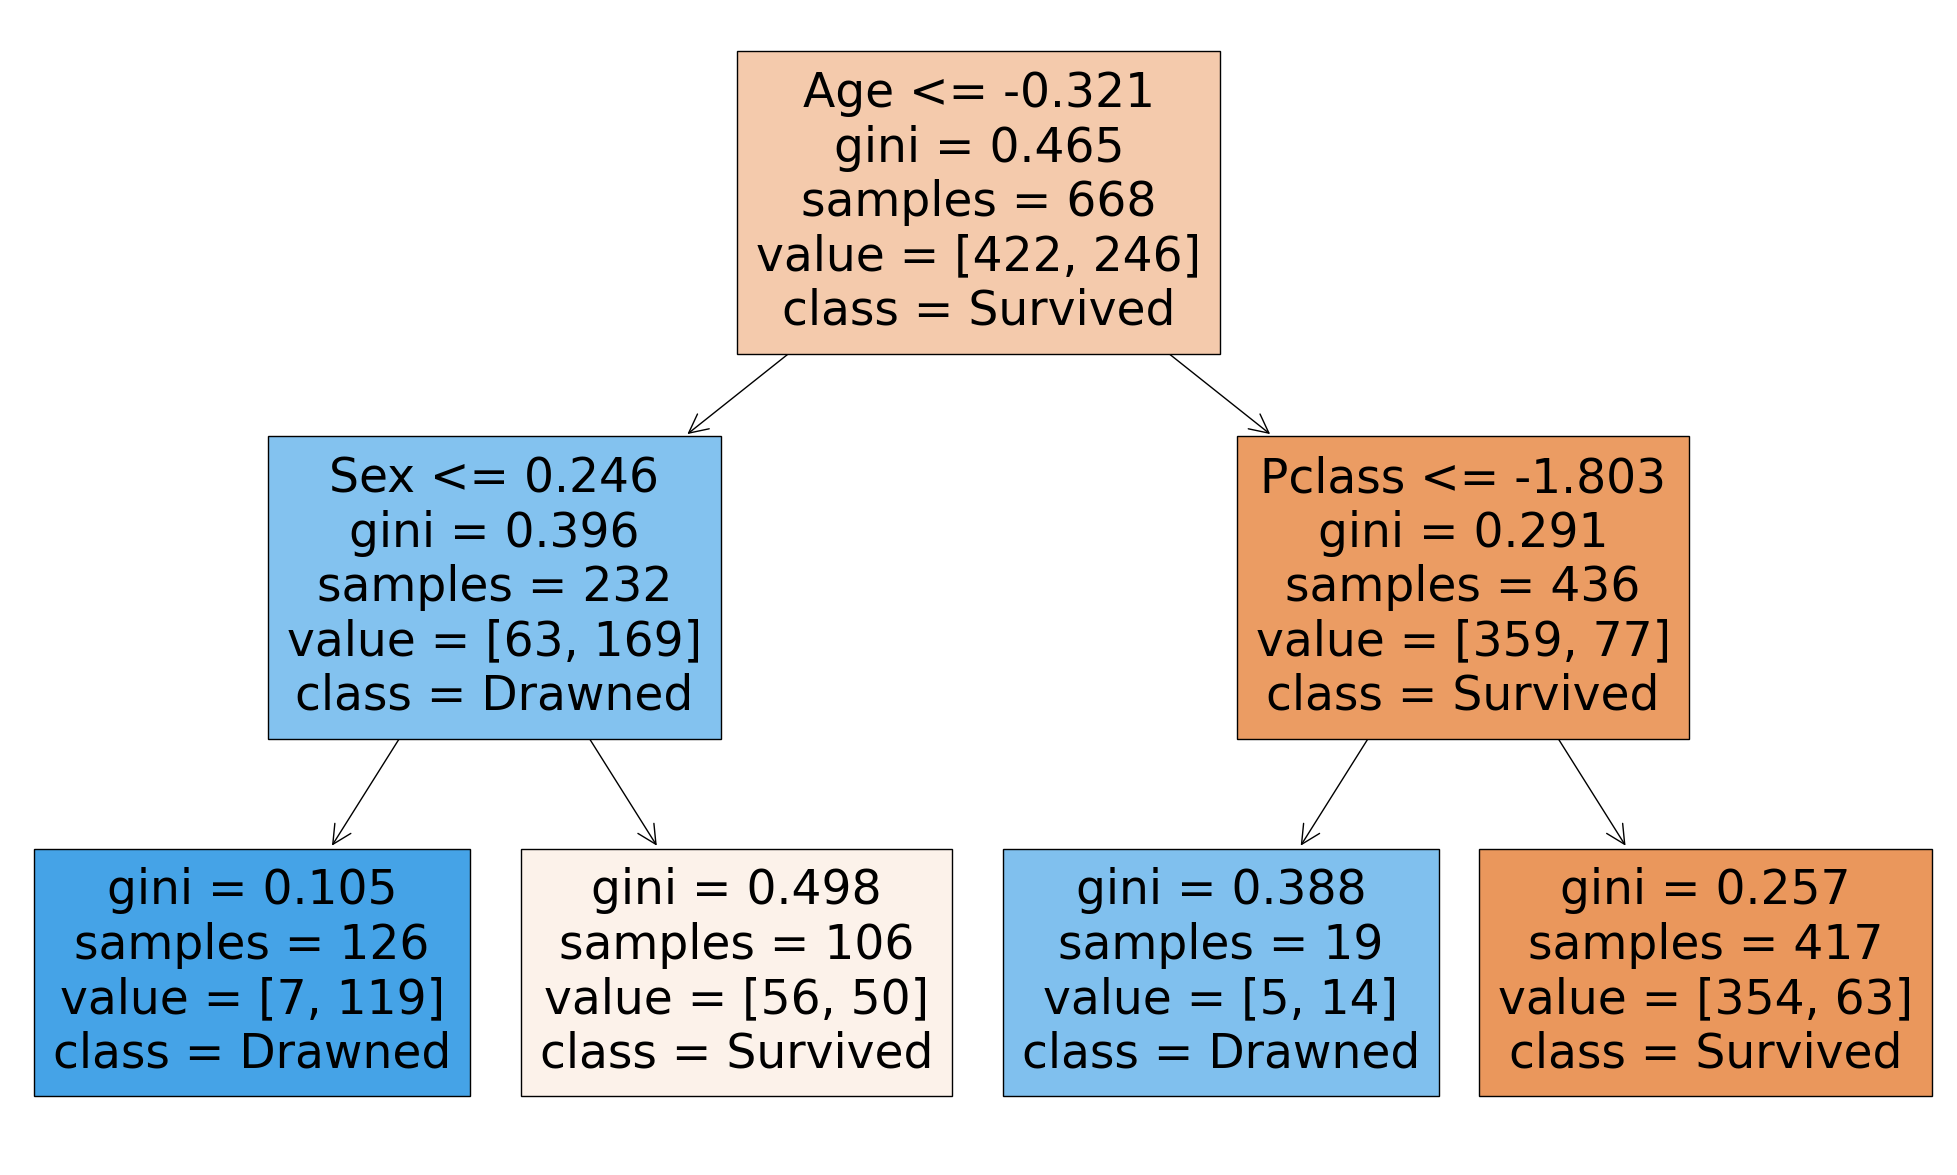

In [52]:
### Plot the tree to interpreter it better:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,15))
t = plot_tree(dt, feature_names=['PassengerId','Sex', "Age",'Pclass','SibSp','Parch','Fare'], 
              class_names=['Survived', 'Drawned'], 
              filled=True)

# Method - 5 Decision Tree with Cross Validation

In [53]:
cross_validation_m = cross_val_score(estimator=dt, # the model to evaluate
                                     X=X_train,
                                     y=y_train,
                                     scoring='accuracy', # evaluation metrics
                                     cv=3, # cross validation splitting
                                     verbose=5) 

[CV] END ................................ score: (test=0.794) total time=   0.0s
[CV] END ................................ score: (test=0.798) total time=   0.0s
[CV] END ................................ score: (test=0.779) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [54]:
print(f'Validation accuracy scores: {np.round(cross_validation_m,2)}')
print(f'\nmean: {cross_validation_m.mean():.2}')
print(f'std: {cross_validation_m.std():.2}')
print(f'\nAccuracy score for the test set is: {round(dt.score(X_test,y_test),3)}')

Validation accuracy scores: [0.79 0.8  0.78]

mean: 0.79
std: 0.0081

Accuracy score for the test set is: 0.744


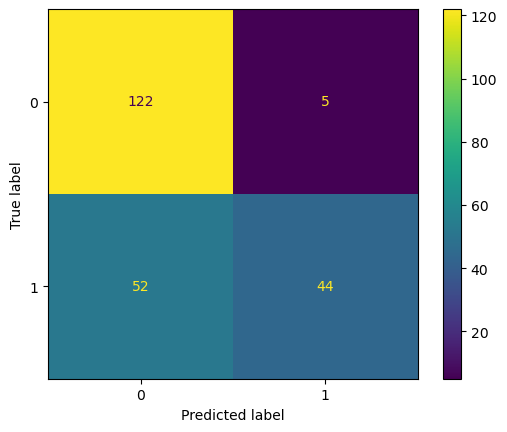

In [55]:
# Confusion Matrix
confusionMatrix(y_test,dpred_y)

In [56]:
print(f"""precision = {round(precision_score(y_test,dpred_y),2)} \n 
recall = {round(recall_score(y_test,dpred_y),2)}\n
f1 = {round(f1_score(y_test,dpred_y),2)}""")

precision = 0.9 
 
recall = 0.46

f1 = 0.61


In [57]:
results['Models'].append('Decision Tree')
results['precision'].append(0.9),
results['recall'].append(0.46),
results['f1'].append(0.61),
results['accuracy score'].append(accuracy_score(y_test,dpred_y))

# Method- 6 Random Forest

In [58]:
# Instanciate a model
rf = RandomForestClassifier(n_estimators=100, 
                              max_depth=4, 
                              max_features=2)

In [59]:
# Fit it to the training data
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=2)

In [60]:
# Look at the test score
rf.score(X_test, y_test)

0.7982062780269058

In [61]:
# Get predictions:
rpred_y = rf.predict(X_test)

In [62]:
importance = rf.feature_importances_
importance

array([0.0616148 , 0.22323319, 0.43554591, 0.11773464, 0.06277433,
       0.05341906, 0.04567806])

In [63]:
#We can access the names of the features in the right order:
rf.feature_names_in_


array(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],
      dtype=object)

In [64]:
feature_importances_df = pd.DataFrame(data= importance, index=rf.feature_names_in_, columns=['feature_importances'])
feature_importances_df

,feature_importances
PassengerId,0.061615
Pclass,0.223233
Sex,0.435546
Age,0.117735
SibSp,0.062774
Parch,0.053419
Fare,0.045678


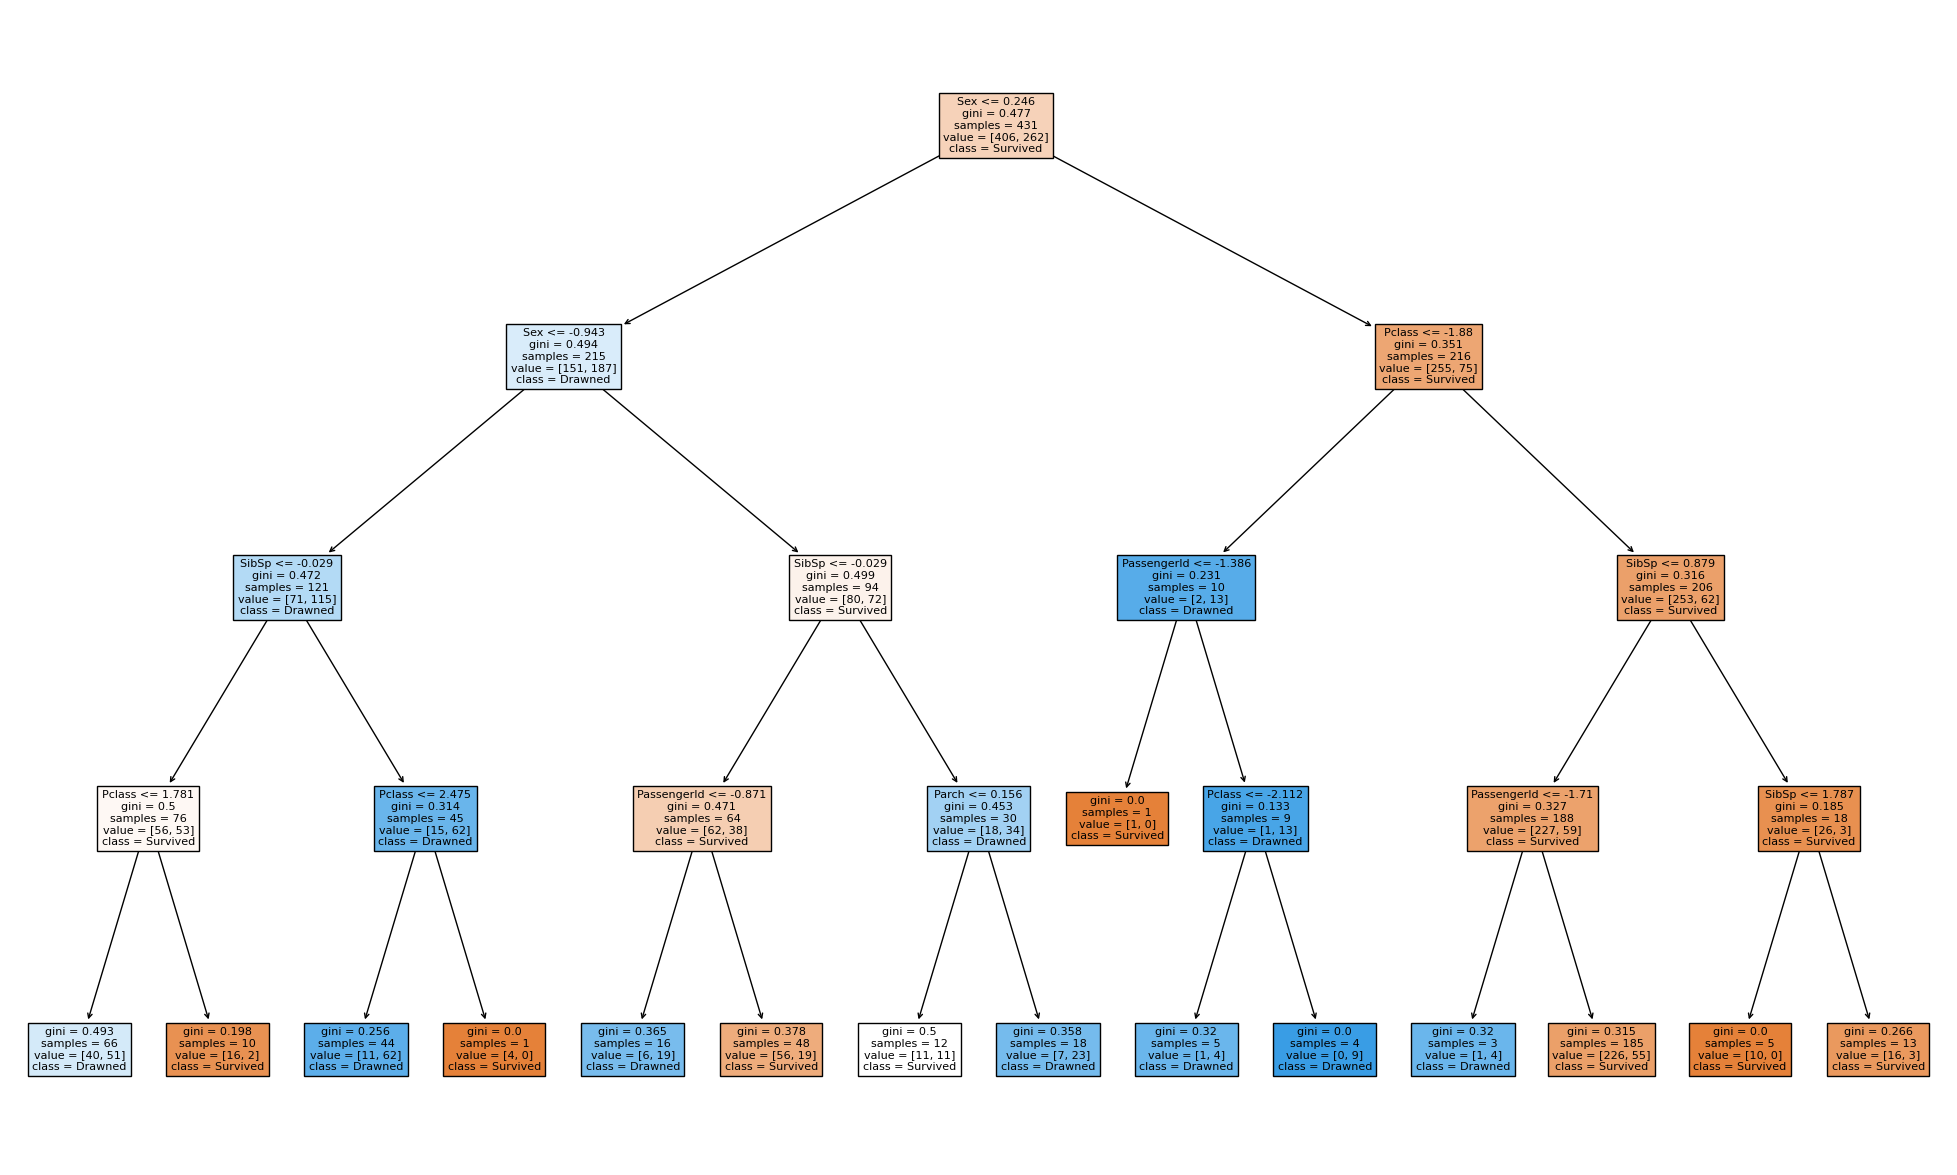

In [65]:
### Plot the tree to interpreter it better:

#Error: 'RandomForestClassifier' object has no attribute 'tree_'
#Solution: rf.estimators_[0] instead of rf in plot_tree argument

from sklearn.tree import plot_tree
plt.figure(figsize=(25,15))
t = plot_tree(rf.estimators_[0], feature_names=['PassengerId','Sex', "Age",'Pclass','SibSp','Parch','Fare'], 
              class_names=['Survived', 'Drawned'], 
              filled=True)

# Method - 7 Random Forest with Cross Validation

In [66]:
cross_validation_m = cross_val_score(estimator=rf, # the model to evaluate
                                     X=X_train,
                                     y=y_train,
                                     scoring='accuracy', # evaluation metrics
                                     cv=3, # cross validation splitting
                                     verbose=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] END ................................ score: (test=0.816) total time=   0.1s
[CV] END ................................ score: (test=0.785) total time=   0.1s
[CV] END ................................ score: (test=0.793) total time=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


In [67]:
print(f'Validation accuracy scores: {np.round(cross_validation_m,2)}')
print(f'\nmean: {cross_validation_m.mean():.2}')
print(f'std: {cross_validation_m.std():.2}')
print(f'\nAccuracy score for the test set is: {round(rf.score(X_test,y_test),3)}')

Validation accuracy scores: [0.82 0.78 0.79]

mean: 0.8
std: 0.013

Accuracy score for the test set is: 0.798


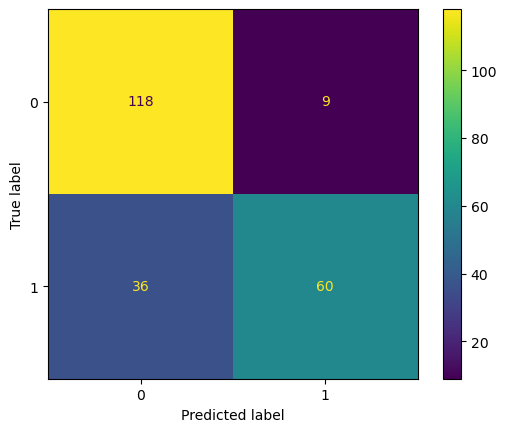

In [68]:
# Confusion Matrix
confusionMatrix(y_test,rpred_y)

In [69]:
print(f"""precision = {round(precision_score(y_test,rpred_y),2)} \n 
recall = {round(recall_score(y_test,rpred_y),2)}\n
f1 = {round(f1_score(y_test,rpred_y),2)}""")

precision = 0.87 
 
recall = 0.62

f1 = 0.73


In [70]:
results['Models'].append('Random Forest')
results['precision'].append(0.9),
results['recall'].append(0.64),
results['f1'].append(0.74),
results['accuracy score'].append(accuracy_score(y_test,rpred_y))

# Method - 8 Support Vector Machine

In [71]:
import pylab as plt

sv = SVC(kernel="rbf",C = 1)# "poly"
sv

SVC(C=1)

In [72]:
sv.decision_function_shape

'ovr'

In [73]:
sv.fit(X_train, y_train)

SVC(C=1)

In [74]:
#Predict the response for test dataset
spred_y = sv.predict(X_test)

In [75]:
print(f'train_score={sv.score(X_train, y_train)}, test_score={sv.score(X_test, y_test)}')

train_score=0.8517964071856288, test_score=0.7847533632286996


# Method - 9 Support Vector Machine with Cross Validation

In [76]:
cross_validation_m = cross_val_score(estimator=sv, # the model to evaluate
                                     X=X_train,
                                     y=y_train,
                                     scoring='accuracy', # evaluation metrics
                                     cv=3, # cross validation splitting
                                     verbose=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END ................................ score: (test=0.803) total time=   0.0s
[CV] END ................................ score: (test=0.821) total time=   0.0s
[CV] END ................................ score: (test=0.820) total time=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [77]:
print(f'Validation accuracy scores: {np.round(cross_validation_m,2)}')
print(f'\nmean: {cross_validation_m.mean():.2}')
print(f'std: {cross_validation_m.std():.2}')
print(f'\nAccuracy score for the test set is: {round(rf.score(X_test,y_test),3)}')

Validation accuracy scores: [0.8  0.82 0.82]

mean: 0.81
std: 0.0083

Accuracy score for the test set is: 0.798


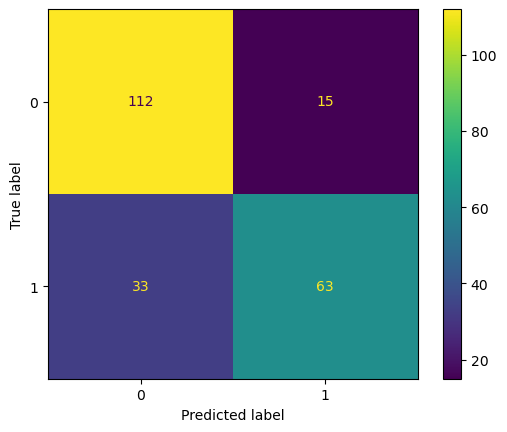

In [78]:
# Confusion Matrix
confusionMatrix(y_test,spred_y)

In [79]:
print(f"""precision = {round(precision_score(y_test,spred_y),2)} \n 
recall = {round(recall_score(y_test,spred_y),2)}\n
f1 = {round(f1_score(y_test,spred_y),2)}""")

precision = 0.81 
 
recall = 0.66

f1 = 0.72


In [80]:
results['Models'].append('Support Vector Machine')
results['precision'].append(0.81),
results['recall'].append(0.66),
results['f1'].append(0.72),
results['accuracy score'].append(accuracy_score(y_test,spred_y))

In [81]:
resultdf=pd.DataFrame(results)
resultdf

,Models,precision,recall,f1,accuracy score
0,Dummy Classifier,0.00,0.00,0.00,0.569507
1,Logistic Regression,0.80,0.69,0.74,0.789238
2,Decision Tree,0.90,0.46,0.61,0.744395
3,Random Forest,0.90,0.64,0.74,0.798206
4,Support Vector Machine,0.81,0.66,0.72,0.784753


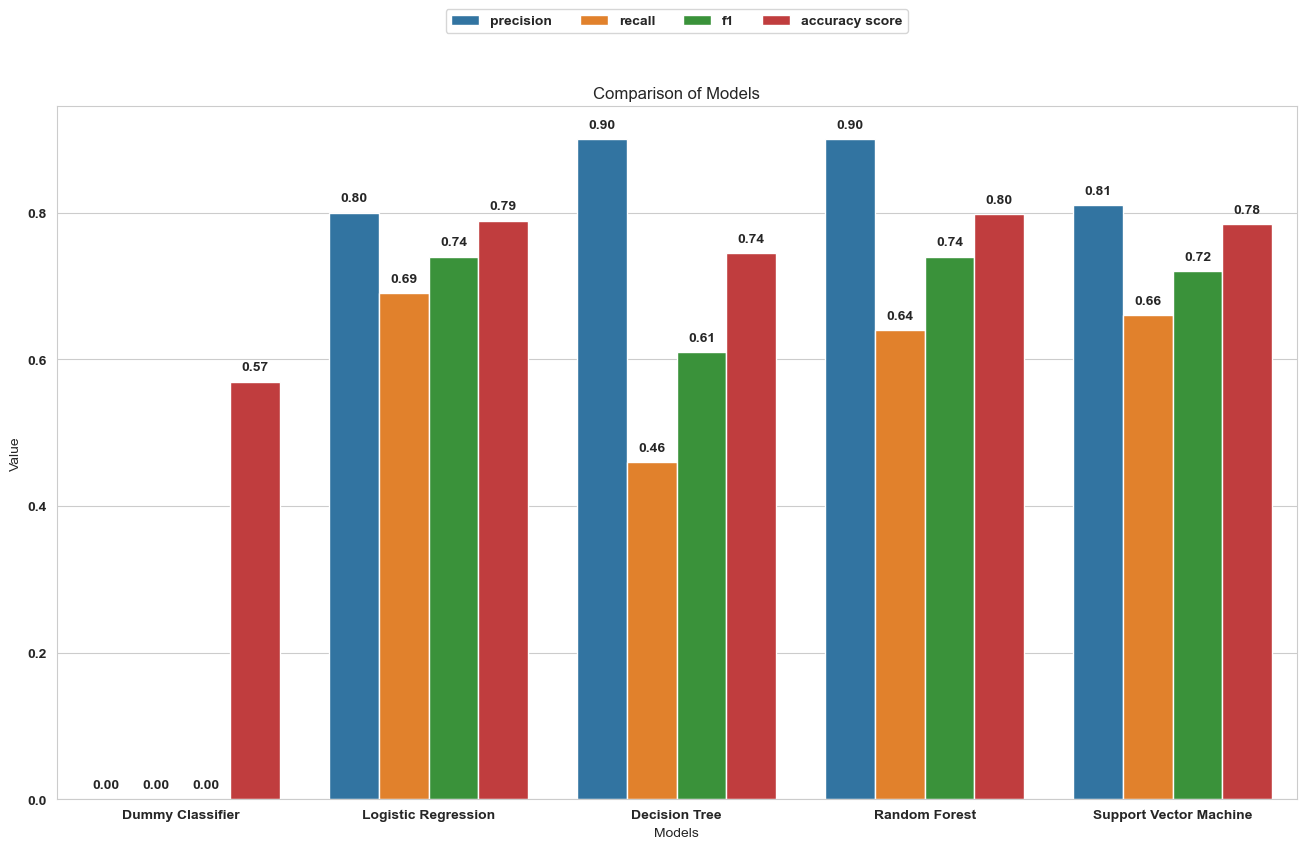

In [82]:
# Melt the data into long format
df1 = pd.melt(resultdf, id_vars=resultdf[['Models']], var_name='Metric', value_name='Value')

plt.rcParams['font.weight'] = 'bold'
# Create the bar plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x='Models', y='Value', hue='Metric', data=df1, ax=ax)

# Add values to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

    # Set the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)

# Set the axis labels and title
ax.set_xlabel('Models')
# Set the font size of the x-axis labels

ax.set_ylabel('Value')
ax.set_title('Comparison of Models')
plt.savefig('Accuracy Comparision.png')
plt.show()